### Importação dos dados



In [45]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# URLs dos arquivos
urls = {
    "loja1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "loja2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "loja3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "loja4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Lê e adiciona coluna da loja
dfs = []
for nome, url in urls.items():
    df = pd.read_csv(url)
    df["loja"] = nome
    dfs.append(df)

# Junta todos os dataframes
dados = pd.concat(dfs, ignore_index=True)

texto_dados = f"""
## Dados de entrada

Para realizar essa análise foi solicitado que cada uma das lojas coletasse as informações de sua operação e gerasse um arquivo no formato CSV.

Dentre as informações retornadas por cada loja estão: "produto", "categoria do produto", "preço", "frete", "data da compra", "vendedor", "local da compra", "avaliação da compra", "tipo de pagamento", "quantidade de parcelas", "latitude" e "longitude".

A primeira etapa da análise consiste em carregar as informações disponibilizadas para seu processamento.

"""

display(Markdown(texto_dados))

def formatar_brl(valor):
    return f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")



## Dados de entrada  

Para realizar essa análise foi solicitado que cada uma das lojas coletasse as informações de sua operação e gerasse um arquivo no formato CSV.

Dentre as informações retornadas por cada loja estão: "produto", "categoria do produto", "preço", "frete", "data da compra", "vendedor", "local da compra", "avaliação da compra", "tipo de pagamento", "quantidade de parcelas", "latitude" e "longitude".

A primeira etapa da análise consiste em carregar as informações disponibilizadas para seu processamento. 



#1. Análise do faturamento



## Faturamento  

A loja que **mais faturou** foi **loja1**, com aproximadamente **R$ 1.616.347,09**.  

Por outro lado, a loja que **menos faturou** foi **loja4**, com cerca de **R$ 1.458.253,46**.



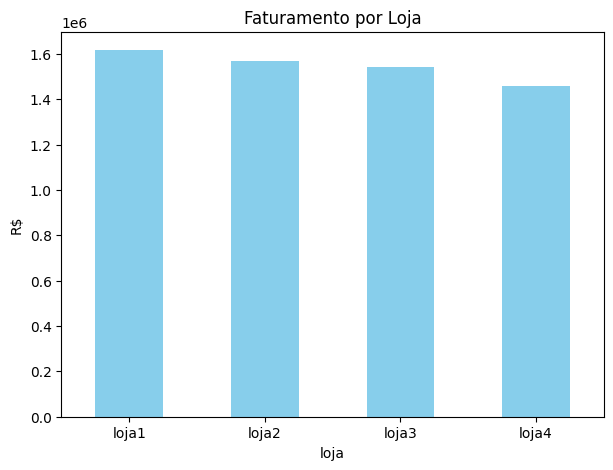

In [18]:
# @title

from IPython.display import display, Markdown

dados["faturamento"] = dados["Preço"] + dados["Frete"]

faturamento_lojas = dados.groupby("loja")["faturamento"].sum()

# --- Texto sobre faturamento ---
loja_mais_faturou = faturamento_lojas.idxmax()
valor_mais_faturou = faturamento_lojas.max()

loja_menos_faturou = faturamento_lojas.idxmin()
valor_menos_faturou = faturamento_lojas.min()

texto_faturamento = f"""
## Faturamento

A loja que **mais faturou** foi **{loja_mais_faturou}**, com aproximadamente **R$ {formatar_brl(valor_mais_faturou)}**.

Por outro lado, a loja que **menos faturou** foi **{loja_menos_faturou}**, com cerca de **R$ {formatar_brl(valor_menos_faturou)}**.

"""

display(Markdown(texto_faturamento))

# Gráfico
faturamento_lojas.plot(kind="bar", figsize=(7,5), color="skyblue")
plt.title("Faturamento por Loja")
plt.ylabel("R$")
plt.xticks(rotation=0)
plt.show()

# 2. Vendas por Categoria



## Categorias mais vendidas 

A análise a seguir mostra as **categorias de produtos mais vendidas**.  

Podemos observar como as lojas distribuem suas vendas entre os diferentes segmentos.


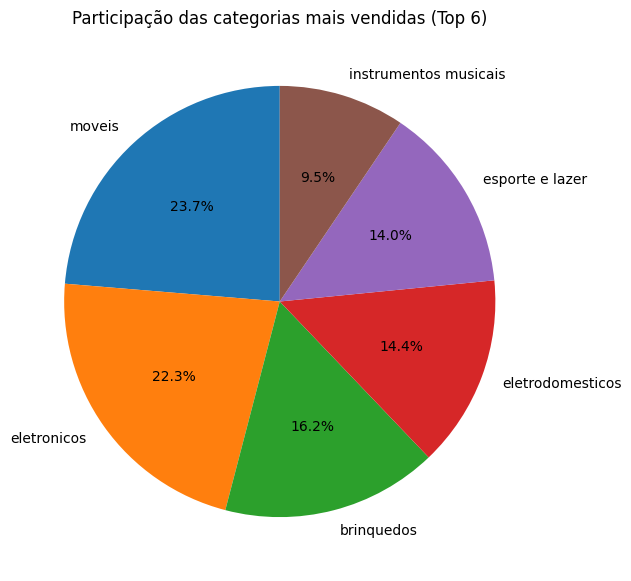

In [21]:
# @title
# --- Categorias mais vendidas ---
texto_categorias = """
## Categorias mais vendidas

A análise a seguir mostra as **categorias de produtos mais vendidas**.

Podemos observar como as lojas distribuem suas vendas entre os diferentes segmentos.
"""
display(Markdown(texto_categorias))

# 🎨 Gráfico de pizza para as categorias (total consolidado)
categorias_totais = dados["Categoria do Produto"].value_counts().head(6)  # top 6
plt.figure(figsize=(7,7))
plt.pie(categorias_totais, labels=categorias_totais.index, autopct="%1.1f%%", startangle=90)
plt.title("Participação das categorias mais vendidas (Top 6)")
plt.show()

# 3. Média de Avaliação das Lojas


## Avaliações dos Clientes  


A loja com **melhor avaliação média** foi **loja3** com nota **4.05**.  

A loja com **pior avaliação média** foi **loja1**, com nota **3.98**.  

O gráfico abaixo mostra a **evolução da avaliação média** entre as lojas:


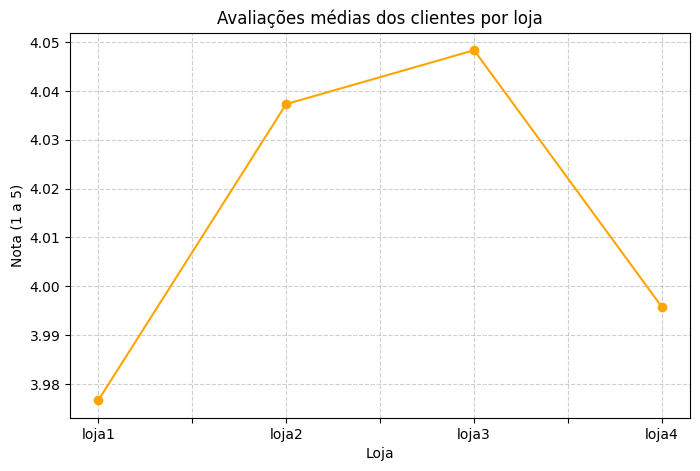

In [25]:
# @title
# --- Avaliações ---
avaliacoes = dados.groupby("loja")["Avaliação da compra"].mean()


loja_melhor_avaliada = avaliacoes.idxmax()
nota_melhor_avaliada = avaliacoes.max()

loja_pior_avaliada = avaliacoes.idxmin()
nota_pior_avaliada = avaliacoes.min()

texto_avaliacoes = f"""
## Avaliações dos Clientes


A loja com **melhor avaliação média** foi **{loja_melhor_avaliada}** com nota **{nota_melhor_avaliada:.2f}**.

A loja com **pior avaliação média** foi **{loja_pior_avaliada}**, com nota **{nota_pior_avaliada:.2f}**.

O gráfico abaixo mostra a **evolução da avaliação média** entre as lojas:
"""
display(Markdown(texto_avaliacoes))

# 🎨 Gráfico de linha
avaliacoes.plot(kind="line", marker="o", figsize=(8,5), color="orange")
plt.title("Avaliações médias dos clientes por loja")
plt.ylabel("Nota (1 a 5)")
plt.xlabel("Loja")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 4. Produtos Mais e Menos Vendidos


## Produtos mais vendidos  

O **produto mais vendido** foi **Cômoda**, com **210 unidades** vendidas.  

Abaixo, o gráfico mostra os **10 produtos mais populares** no consolidado das lojas:


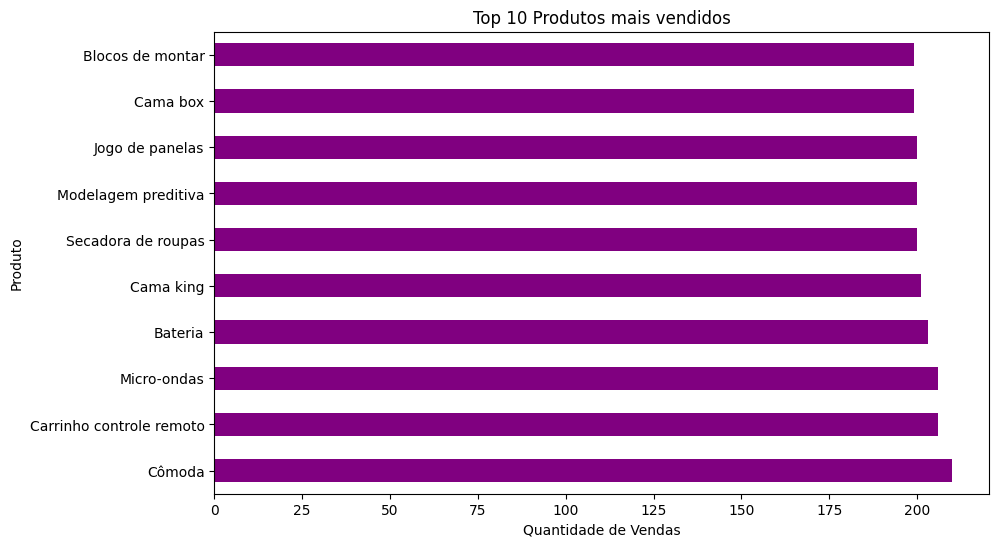

In [28]:
# @title
produtos = dados["Produto"].value_counts().head(10)

# --- Produtos mais vendidos ---
produto_top = produtos.idxmax()
qtd_top = produtos.max()

texto_produtos = f"""
## Produtos mais vendidos

O **produto mais vendido** foi **{produto_top}**, com **{qtd_top} unidades** vendidas.

Abaixo, o gráfico mostra os **10 produtos mais populares** no consolidado das lojas:
"""
display(Markdown(texto_produtos))

# 🎨 Gráfico horizontal de barras
produtos.plot(kind="barh", figsize=(10,6), color="purple")
plt.title("Top 10 Produtos mais vendidos")
plt.xlabel("Quantidade de Vendas")
plt.show()


# 5. Frete Médio por Loja



## Frete médio  
A loja com  **maior frete médio**  foi  **loja1**, com  **R$ 34,69** . 

A loja com  **menor frete médio**  foi  **loja4**, com  **R$ 31,28** .  


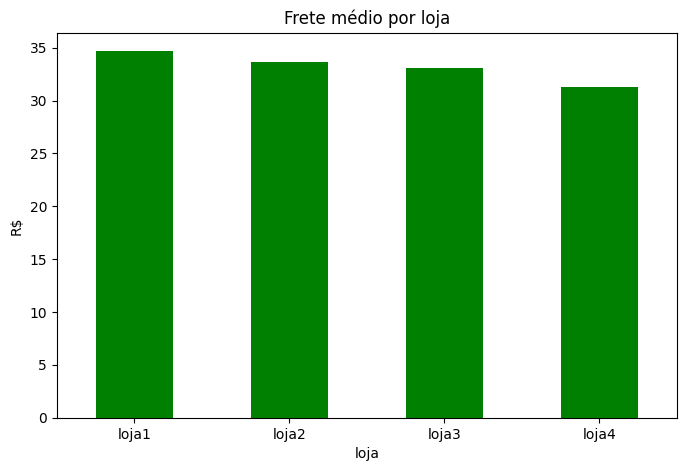

In [31]:
# @title
frete_medio = dados.groupby("loja")["Frete"].mean()

# --- Frete médio ---
loja_maior_frete = frete_medio.idxmax()
valor_maior_frete = frete_medio.max()

loja_menor_frete = frete_medio.idxmin()
valor_menor_frete = frete_medio.min()

texto_frete = f"""
## Frete médio
A loja com  **maior frete médio**  foi  **{loja_maior_frete}**, com  **R$ {formatar_brl(valor_maior_frete)}** .

A loja com  **menor frete médio**  foi  **{loja_menor_frete}**, com  **R$ {formatar_brl(valor_menor_frete)}** .
"""
display(Markdown(texto_frete))

# 🎨 Gráfico de barras
frete_medio.plot(kind="bar", figsize=(8,5), color="green")
plt.title("Frete médio por loja")
plt.ylabel("R$")
plt.xticks(rotation=0)
plt.show()


# Análises e Recomendações

In [44]:
# @title
texto_final = f"""
# 📊 Recomendação final – Análise das Lojas

Este relatório apresenta a análise comparativa de desempenho das quatro lojas, considerando faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.
O objetivo é identificar **qual loja é menos interessante de ser mantida em funcionamento**.

---

## 💰 Faturamento.
- **Loja1**: R$  {formatar_brl(valor_mais_faturou)}  => **maior faturamento**

- **Loja4**: R$  {formatar_brl(valor_menos_faturou)}  => **menor faturamento**

> Diferença aproximada de 10% entre a maior e a menor receita.

---

## 🛒 Categorias de Produtos
- As categorias **móveis e eletrônicos** representam **46% das vendas**.
- Isso mostra que o mix de produtos é relativamente homogêneo entre as lojas.

---

## ⭐ Avaliações dos Clientes
- **Loja3**: {formatar_brl(nota_melhor_avaliada)} => **melhor avaliação média**
- **Loja1**: {formatar_brl(nota_pior_avaliada)} => **pior avaliação média**

> As notas são próximas, mas a Loja1 se destaca negativamente mesmo com maior faturamento.

---

## 📦 Produtos Mais Vendidos
- O **produto mais vendido** foi a **Cômoda**, com **210 unidades**.
- Reforça a importância da categoria **móveis** no desempenho.

---

## 🚚 Frete Médio
- **Loja1**: R$  {formatar_brl(valor_maior_frete)}  => **maior custo de frete médio**

- **Loja4**: R$  {formatar_brl(valor_menor_frete)}  => **menor custo de frete médio**

> A Loja1, apesar de mais faturamento, opera com maior ineficiência logística.

---

## 📌 Conclusão
Ao considerar não apenas o faturamento, mas também **eficiência logística, satisfação do cliente e sustentabilidade da operação**, temos:

- **Loja1**
  -  Maior faturamento.
  -  Pior avaliação dos clientes.
  -  Maior custo de frete.
  -  Indica **ineficiência e risco de perda de margem** no médio prazo.

- **Loja4**
  -  Menor faturamento.
  -  Melhor custo logístico.
  -  Avaliação razoável.
  -  Potencial de crescimento com ajustes de estratégia.

---

## 🏆 Recomendação
A loja menos interessante de ser mantida em funcionamento é a **Loja1**.

Apesar de seu maior faturamento, a combinação de **custos logísticos elevados** e **pior avaliação dos clientes** compromete a rentabilidade e a imagem da operação.
Já a **Loja4**, mesmo com menor faturamento, mostra **eficiência logística** e pode ser fortalecida estrategicamente.

"""
display(Markdown(texto_final))



# 📊 Recomendação final – Análise das Lojas

Este relatório apresenta a análise comparativa de desempenho das quatro lojas, considerando faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.  
O objetivo é identificar **qual loja é menos interessante de ser mantida em funcionamento**.

---

## 💰 Faturamento.
- **Loja1**: R$  1.616.347,09  => **maior faturamento** 

- **Loja4**: R$  1.458.253,46  => **menor faturamento**  

> Diferença aproximada de 10% entre a maior e a menor receita.

---

## 🛒 Categorias de Produtos
- As categorias **móveis e eletrônicos** representam **46% das vendas**.  
- Isso mostra que o mix de produtos é relativamente homogêneo entre as lojas.

---

## ⭐ Avaliações dos Clientes
- **Loja3**: 4,05 => **melhor avaliação média**  
- **Loja1**: 3,98 => **pior avaliação média**  

> As notas são próximas, mas a Loja1 se destaca negativamente mesmo com maior faturamento.

---

## 📦 Produtos Mais Vendidos
- O **produto mais vendido** foi a **Cômoda**, com **210 unidades**.  
- Reforça a importância da categoria **móveis** no desempenho.

---

## 🚚 Frete Médio
- **Loja1**: R$  34,69  => **maior custo de frete médio**   

- **Loja4**: R$  31,28  => **menor custo de frete médio**  

> A Loja1, apesar de mais faturamento, opera com maior ineficiência logística.

---

## 📌 Conclusão
Ao considerar não apenas o faturamento, mas também **eficiência logística, satisfação do cliente e sustentabilidade da operação**, temos:

- **Loja1**  
  -  Maior faturamento.  
  -  Pior avaliação dos clientes.  
  -  Maior custo de frete.  
  -  Indica **ineficiência e risco de perda de margem** no médio prazo.  

- **Loja4**  
  -  Menor faturamento.  
  -  Melhor custo logístico.  
  -  Avaliação razoável.  
  -  Potencial de crescimento com ajustes de estratégia.  

---

## 🏆 Recomendação
A loja menos interessante de ser mantida em funcionamento é a **Loja1**.  

Apesar de seu maior faturamento, a combinação de **custos logísticos elevados** e **pior avaliação dos clientes** compromete a rentabilidade e a imagem da operação.  
Já a **Loja4**, mesmo com menor faturamento, mostra **eficiência logística** e pode ser fortalecida estrategicamente. 

